In [472]:
%matplotlib inline
import numpy as np
import pandas as pd
from random import uniform, seed
from typing import List
import matplotlib.pyplot as plt

In [473]:
N = 100
SIZE = N * N
# occupied & vacant places in percentages
OCCUPIED_RATION = 0.45 
VACANT_RATION = 0.1

# SIZE OF SCATTER
SCATTER_SIZE = N/10 * 2


In [474]:
def pltcolor(arr: List) -> List:
    """Return list of point colors"""
    colors_set = {0: 'blue', 1: 'red', -1: 'white'}
    colors = list()
    for item in arr:
        colors.append(colors_set.get(item))
    return colors_set


def get_y() -> List:
    """Return values of axis OY"""
    return [[].append(i//N) for i in range(N*N)]


def get_x() -> List:
    """Return values of axis OX"""
    return [i for i in range(N)] * N

In [475]:
array = np.zeros(SIZE, dtype=np.int8)
# Brilliant way to fill array
array[:int(SIZE*OCCUPIED_RATION)] = 1
array[-int(SIZE*VACANT_RATION):] = -1
np.random.shuffle(array)

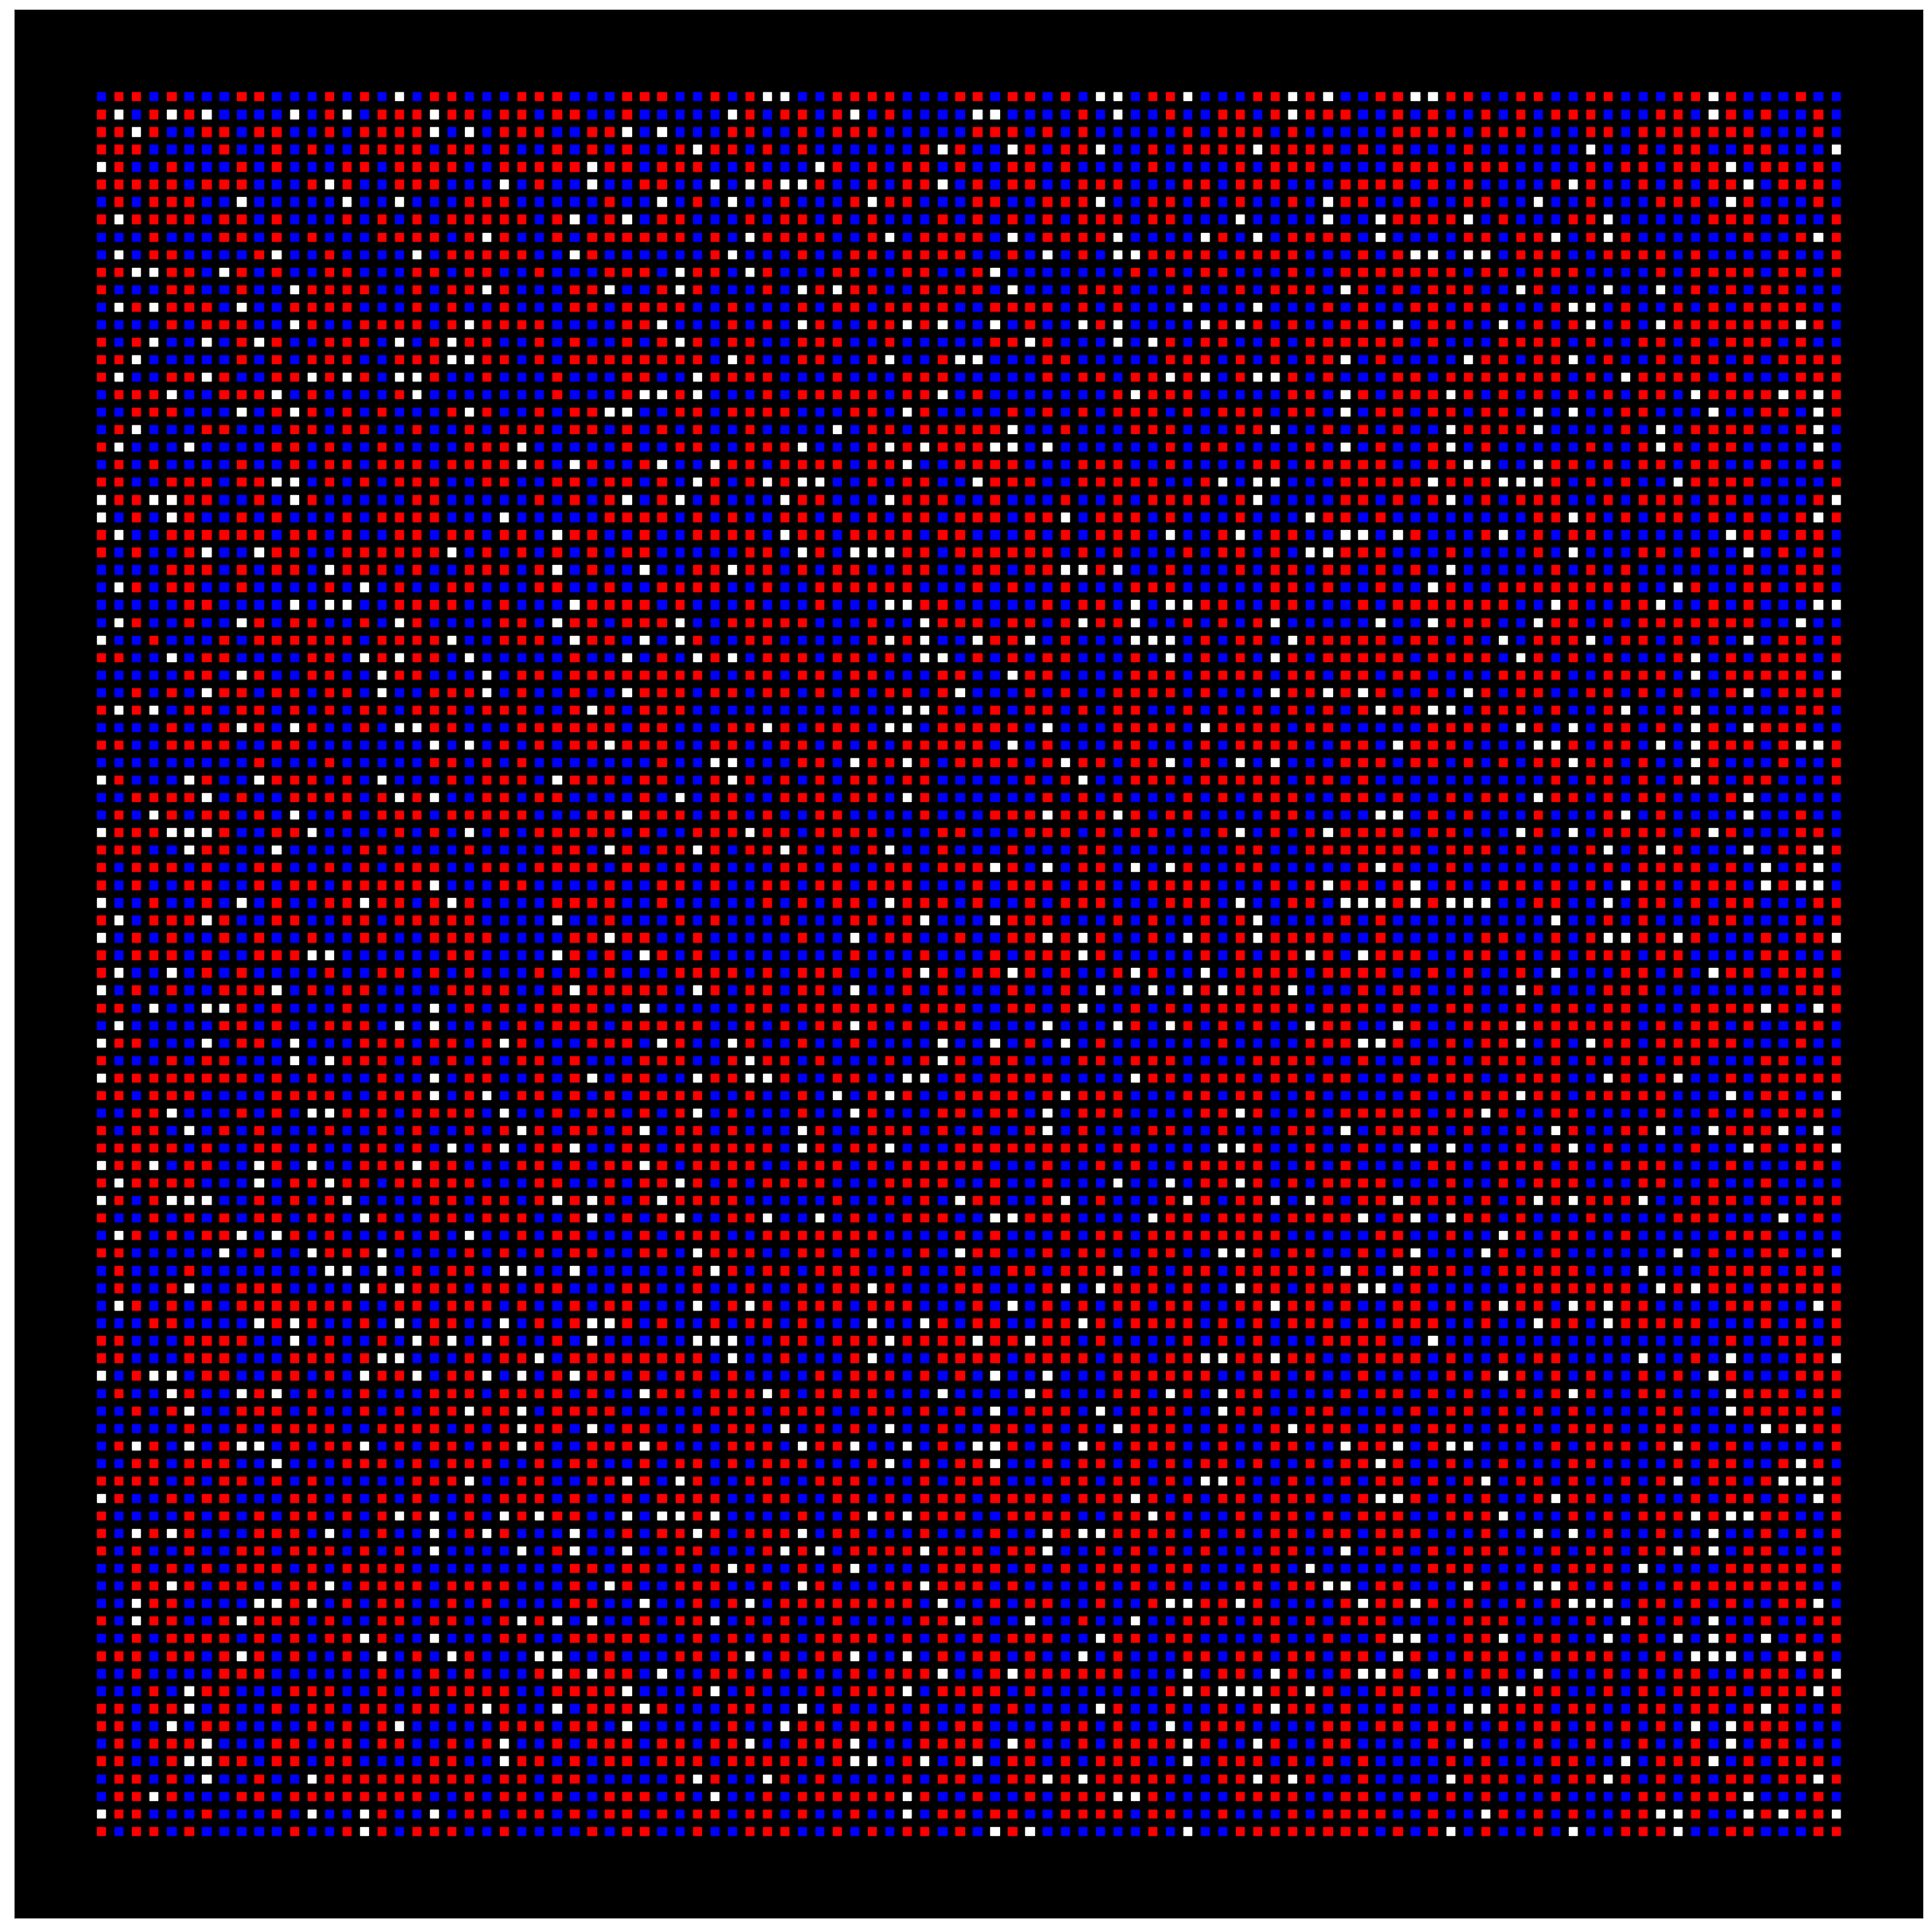

In [476]:
fig, ax = plt.subplots()
ax.scatter(x=get_x(), y=get_y(), marker='s', c = pltcolor(arr=array))

ax.set_facecolor('black')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

fig.set_figwidth(SCATTER_SIZE) 
fig.set_figheight(SCATTER_SIZE)


plt.show()

In [477]:
vacant = [[id//N, id%N] for id, value in enumerate(array) if value == VACANT]